# Fake News Detection

Fake news is false or misleading information presented as news. It often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue.

In today's world prevalence of fake news has increased with the rise of social media.

Fake news can reduce the impact of real news by competing with it, a Buzzfeed analysis found that the top fake news stories often receives more engagement than top stories from major media outlets. It also has the potential to undermine trust in serious media coverage.

Moreover nowadays with the onset of bots fake news are getting created and being spread more than ever, the problem is real and hard to solve because the bots are getting better in tricking us, so we need better systems that help us understand the patterns of fake news to improve our social media, communication and to prevent confusion in the world.

## The solution is divided into the following sections:
- Data understanding and exploration
- Data cleaning.
- Data Analysis.
- Data preparation.
- Model building, Prediction and Model evaluation.

### Data understanding and exploration

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,recall_score,precision_score,classification_report

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score

# pip install pandas-profiling 
# from pandas_profiling import ProfileReport

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.utils import shuffle
import string

import nltk
from nltk.corpus import stopwords
from nltk import tokenize

from wordcloud import WordCloud

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Downloading the NLTK stopword list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jaydeep.Basu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Importing the True/Real news dataset
data_true = pd.read_csv("../data/True.csv")
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
# Importing the Fake news dataset
data_fake = pd.read_csv("../data/Fake.csv")
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# Checking the size of the real news dataset
data_true.shape

(21417, 4)

In [6]:
# Checking the size of the fake news dataset
data_fake.shape

(23481, 4)

In [7]:
# Checking the dattype, number of null's in the real news dataset
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
# Checking the dattype, number of null's in the fake news dataset
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
# Creating a target variable with value as "real" in the real/true news dataset
data_true['target'] = 'real'

In [10]:
# Printing few rows to verify whether the change is performed
data_true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


In [11]:
# Creating a target variable with value as "fake" in the fake news dataset
data_fake['target'] = 'fake'

In [12]:
# Printing few rows to verify whether the change is performed
data_fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


### Data cleaning

In [13]:
# Concatting both the dataframes into one
data = pd.concat([data_fake, data_true]).reset_index(drop = True)

In [14]:
# Printing few rows to verify the change
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [15]:
# Shuffling the data to avoid bias
data = shuffle(data)
data = data.reset_index(drop=True)

In [16]:
# Printing few rows to verify the change
data.head()

,title,text,subject,date,target
0,Joe Biden DESTROYS Trump In Fiery DNC Speech:...,Everyone paying attention to the 2016 presiden...,News,"July 27, 2016",fake
1,BREAKING: House Dems Have HAD IT With Trump A...,House Democrats have had it with Donald Trump ...,News,"January 29, 2017",fake
2,SHOCKING REPORT: 50% of Babies in 24 States Bo...,New Mexico led all states with 72 percent of t...,left-news,"Mar 24, 2017",fake
3,"Leading Republicans, Democrats reject Trump's ...",WASHINGTON (Reuters) - The leaders of the U.S....,politicsNews,"March 16, 2017",real
4,Ousted Catalan leaders to appear in Belgian co...,BRUSSELS (Reuters) - Ousted Catalan President ...,worldnews,"November 6, 2017",real


In [17]:
# Dropping date column as it is not going to add value in this problem statement
data.drop(["date"],axis=1,inplace=True)

In [18]:
# Dropping title as we are going to consider the text column for our analysis
data.drop(["title"],axis=1,inplace=True)

In [19]:
# Converting all text to lower case
data['text'] = data['text'].apply(lambda x: x.lower())

In [20]:
# Printing few rows to verify the change
data['text'].head()

0    everyone paying attention to the 2016 presiden...
1    house democrats have had it with donald trump ...
2    new mexico led all states with 72 percent of t...
3    washington (reuters) - the leaders of the u.s....
4    brussels (reuters) - ousted catalan president ...
Name: text, dtype: object

In [21]:
# Planning to remove all the punctuations from the data using "string.punctuation", just printing to check the 
# punctuation list
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
# Created a method to remove all the punctuations from the entire data
def punctuation_removal(text):
    all_char_list = [char for char in text if char not in string.punctuation]
    clean_text = ''.join(all_char_list)
    return clean_text

In [23]:
# Calling the method to remove the punctuations
data['text'] = data['text'].apply(punctuation_removal)

In [24]:
# Printing few rows to verify the change
data['text'].head()

0    everyone paying attention to the 2016 presiden...
1    house democrats have had it with donald trump ...
2    new mexico led all states with 72 percent of t...
3    washington reuters  the leaders of the us sena...
4    brussels reuters  ousted catalan president car...
Name: text, dtype: object

In [25]:
# Listing down all the stopwords from NLTK package in "stop"
stop = stopwords.words('english')

In [26]:
# Created a method to remove all stop words from the dataset
def stopword_removal(text):
    all_word_list = [word for word in text.split() if word not in (stop)]
    clean_text = ' '.join(all_word_list)
    return clean_text

In [27]:
# Calling the method to remove the stop words
data['text'] = data['text'].apply(stopword_removal)

In [28]:
# Printing few rows to verify the change
data['text'].head()

0    everyone paying attention 2016 presidential el...
1    house democrats donald trump unlawful muslim b...
2    new mexico led states 72 percent babies born 2...
3    washington reuters leaders us senate intellige...
4    brussels reuters ousted catalan president carl...
Name: text, dtype: object

## Data Analysis

In [29]:
# Printing few rows to verify the change
data.head()

,text,subject,target
0,everyone paying attention 2016 presidential el...,News,fake
1,house democrats donald trump unlawful muslim b...,News,fake
2,new mexico led states 72 percent babies born 2...,left-news,fake
3,washington reuters leaders us senate intellige...,politicsNews,real
4,brussels reuters ousted catalan president carl...,worldnews,real


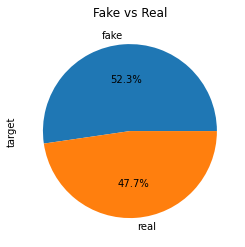

In [30]:
# Plot the percentage of real vs fake cases
plt.title('Fake vs Real')
data['target'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [31]:
# Checking the spread of data by subjects
data['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

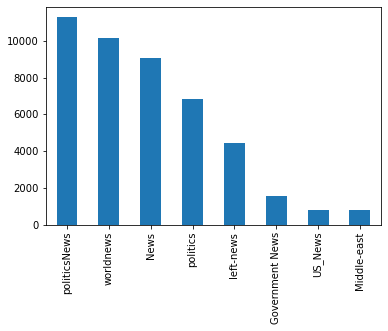

In [32]:
# Plotting the above information
data['subject'].value_counts().plot.bar()

In [33]:
# Grouping the fake/real news with respect to subjects to showcase the spread of data
data.groupby(['target'])['subject'].value_counts()

target  subject        
fake    News                9050
        politics            6841
        left-news           4459
        Government News     1570
        US_News              783
        Middle-east          778
real    politicsNews       11272
        worldnews          10145
Name: subject, dtype: int64

#### Maximum number of fake articles are related to subject "news"
#### Maximum number of real articles are related to subject "political news"

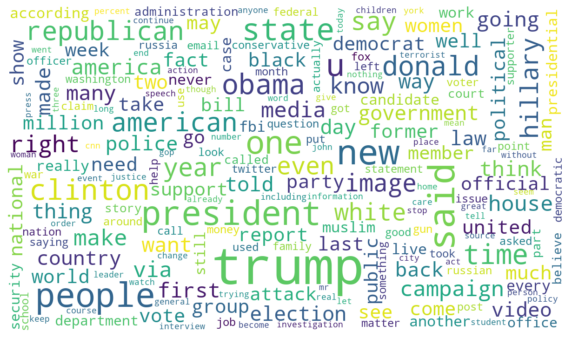

In [34]:
# Creating word cloud of fake news, where the words appearing larger are more frequent in nature acros articles

fake_data = data[data["target"] == "fake"]
all_fakewords = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 1200, height= 700,
                          max_font_size = 110,background_color="white",
                          collocations = False).generate(all_fakewords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

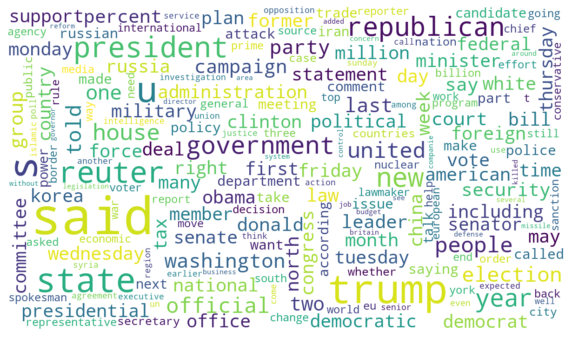

In [35]:
# Creating word cloud of real news, where the words appearing larger are more frequent in nature acros articles

real_data = data[data["target"] == "real"]
all_realwords = ' '.join([text for text in real_data.text])
wordcloud = WordCloud(width= 1200, height= 700,
                          max_font_size = 110,background_color="white",
                          collocations = False).generate(all_realwords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
# Created a method using WhitespaceTokenizer and FreqDist to identify the most frequent set of words in the datset segregated
# by target variable

token_wspace = tokenize.WhitespaceTokenizer()

def mostFrequentWords(df,quantity):
    all_words = ' '.join([text for text in df['text']])
    all_tokens = token_wspace.tokenize(all_words)
    freq_dist = nltk.FreqDist(all_tokens)
    df_frequency = pd.DataFrame({"Word":list(freq_dist.keys()), "Frequency":list(freq_dist.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

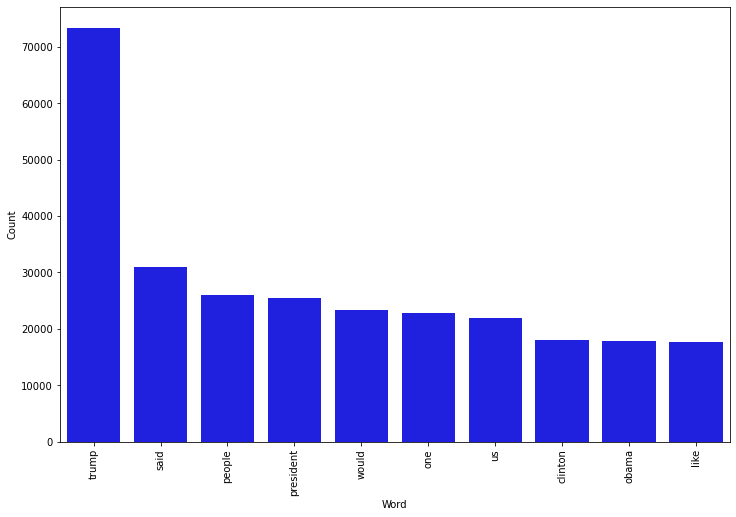

In [37]:
# Calling the above method for fake cases, plotting the most frequent top 10 words
mostFrequentWords(data[data['target']=='fake'],10)

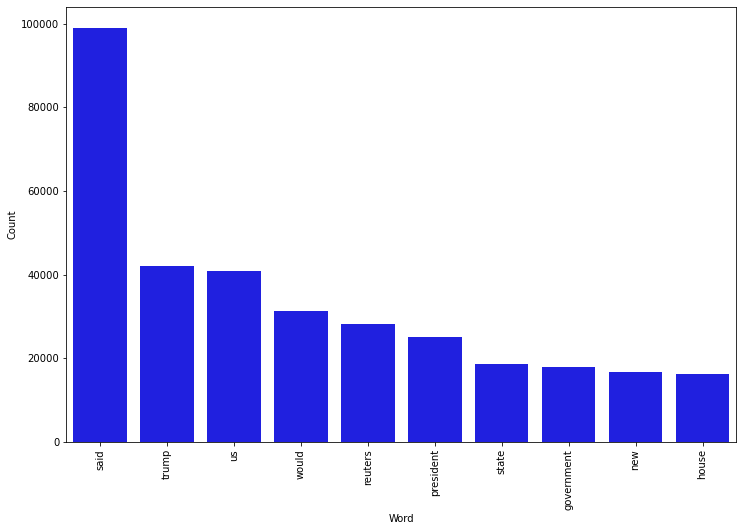

In [38]:
# Calling the above method for real cases, plotting the most frequent top 10 words
mostFrequentWords(data[data['target']=='real'],10)

## Data Preparation

In [39]:
# Dividing the entire data into X and y that is all independent feature into X and dependent feature to y
X = data['text']
y = data['target']

In [40]:
# splitting into train and test set
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [41]:
# splitting the test set into further test and validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,train_size=0.5,random_state=42,stratify=y_test)

## Model building, Prediction and Model evaluation

### Fitting Multinomial Naive Bayes Model

In [57]:
# Running a pipeline to run following functions sequentially : CountVectorizer,TfidfTransformer,MultinomialNB model

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

# Fitting the model
multinomialNBModel = pipe.fit(X_train, y_train)

# Accuracy
y_test_pred = multinomialNBModel.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_test_pred)*100,2)))

accuracy: 95.13%


### Fitting Logistic Regression Model

In [42]:
# Running a pipeline to run following functions sequentially : CountVectorizer,TfidfTransformer,Logistic Regression model

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
logisticmodel = pipe.fit(X_train, y_train)

# Accuracy
y_test_pred = logisticmodel.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_test_pred)*100,2)))

accuracy: 98.93%


In [43]:
# Printing the confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

array([[3481,   41],
       [  31, 3182]], dtype=int64)

### Fitting DecisionTreeClassifier Model

In [44]:
# Running a pipeline to run following functions sequentially : CountVectorizer,TfidfTransformer,DecisionTreeClassifier model

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier())])

# Fitting the model
DTModel = pipe.fit(X_train, y_train)

# Accuracy
y_test_pred = DTModel.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_test_pred)*100,2)))

accuracy: 99.72%


In [45]:
# Printing the confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

array([[3512,   10],
       [   9, 3204]], dtype=int64)

### Fitting RandomForestClassifier Model

In [47]:
# Running a pipeline to run following functions sequentially : CountVectorizer,TfidfTransformer,RandomForestClassifier model

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])
                 
RFModel = pipe.fit(X_train, y_train)
                 
y_test_pred = RFModel.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_test_pred)*100,2)))

accuracy: 99.26%


In [48]:
# Printing the confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

array([[3487,   35],
       [  15, 3198]], dtype=int64)

### DecisionTreeClassifier - Hyperparameter Tuning

In [49]:
# Running a pipeline to run following functions sequentially : CountVectorizer,TfidfTransformer

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer())])

X_val_tfidf = pipe.fit_transform(X_val)

In [50]:
# Create the parameter grid and setting KFold to 5, using RandomizedSearchCV to do hyperparamater tuning on validation data

folds = KFold(n_splits=5, shuffle=True,random_state=42)

param_grid = {
    'max_depth': range(10,100,10),
    'min_samples_leaf': range(10, 300, 10),
    'min_samples_split': range(10, 300, 10),
    'criterion': ["entropy", "gini"]
}

# Instantiate the RandomizedSearchCV model
dtree = DecisionTreeClassifier()
dTree_grid_search = RandomizedSearchCV(estimator = dtree,
                                 param_distributions = param_grid,
                                 scoring='accuracy',
                                 n_jobs=-1,
                                 cv = folds,
                                 random_state=42,
                                 n_iter=100,
                                 verbose = 1)

# Fit the grid search to the data
dTree_grid_search.fit(X_val_tfidf,y_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.9min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(10, 100, 10),
                                        'min_samples_leaf': range(10, 300, 10),
                                        'min_samples_split': range(10, 300, 10)},
                   random_state=42, scoring='accuracy', verbose=1)

In [51]:
# Printing the best score that we can get using the parameters
print('We can get score of :',dTree_grid_search.best_score_,' using',dTree_grid_search.best_params_)
# best_estimator_

We can get score of : 0.993615441722346  using {'min_samples_split': 210, 'min_samples_leaf': 280, 'max_depth': 70, 'criterion': 'gini'}


In [52]:
# Running a pipeline to run following functions sequentially : CountVectorizer,TfidfTransformer,DecisionTreeClassifier model
# with the selected parameters

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(min_samples_split=210, min_samples_leaf=280, 
                                                  max_depth=70, criterion='gini'))])

# Fitting the model
DTModel_Hyper = pipe.fit(X_train, y_train)

# Accuracy
y_test_pred = DTModel_Hyper.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_test_pred)*100,2)))

accuracy: 99.35%


### RandomForestClassifier - Hyperparameter Tuning

In [53]:
# Create the parameter grid and setting KFold to 5, using RandomizedSearchCV to do hyperparamater tuning on validation data

folds = KFold(n_splits=5, shuffle=True,random_state=42)

param_grid = {
    'criterion': ["entropy", "gini"],
    'max_depth': range(0,50,2),
    'min_samples_leaf': range(10,100,10),
    'min_samples_split': range(10,100,10),
    'n_estimators': [40,50,60,70,80,100,200,300], 
    'max_features': ["auto", "sqrt", "log2"]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid_search = RandomizedSearchCV(estimator = rf, 
                                    param_distributions = param_grid,
                                    scoring='accuracy',
                                    cv = folds, 
                                    n_jobs = -1,
                                    verbose = 1,
                                    n_iter=100,
                                    random_state=42)

rf_grid_search.fit(X_val_tfidf, y_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.4min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(0, 50, 2),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(10, 100, 10),
                                        'min_samples_split': range(10, 100, 10),
                                        'n_estimators': [40, 50, 60, 70, 80,
                                                         100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=1)

In [54]:
# Printing the best score that we can get using the parameters
print('We can get score of :',rf_grid_search.best_score_,' using',rf_grid_search.best_params_)
# best_estimator_

We can get score of : 0.9769858945805494  using {'n_estimators': 80, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 24, 'criterion': 'gini'}


In [56]:
# Running a pipeline to run following functions sequentially : CountVectorizer,TfidfTransformer,RandomForestClassifier model
# with the selected parameters

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=80, min_samples_split=10, min_samples_leaf=10, 
                                                  max_features='auto', max_depth=24, criterion='gini'))])
                 
RFModel_hyper = pipe.fit(X_train, y_train)
                 
y_test_pred = RFModel_hyper.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_test_pred)*100,2)))

accuracy: 98.07%


## Finally we see that the DecisionTree Classifier model with default parameters gave us the best accuracy of 99.72% , hence I would go with that model for future predictions.